<Axes: >

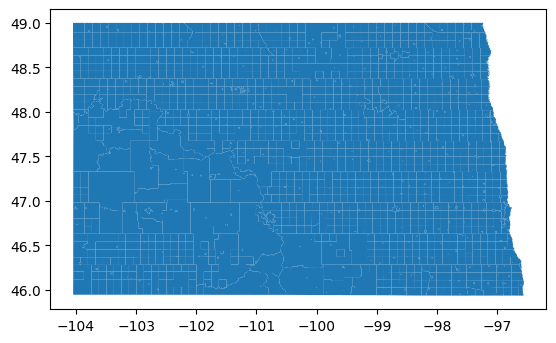

In [1]:
import geopandas

gdf = geopandas.read_file('nd_county_map/tl_2022_38_cousub.shp')
gdf["county_fips"] = gdf.apply(lambda row : int(row['GEOID'][:5]), axis=1)
gdf = gdf[["county_fips", "geometry"]]

gdf.plot()

<Axes: >

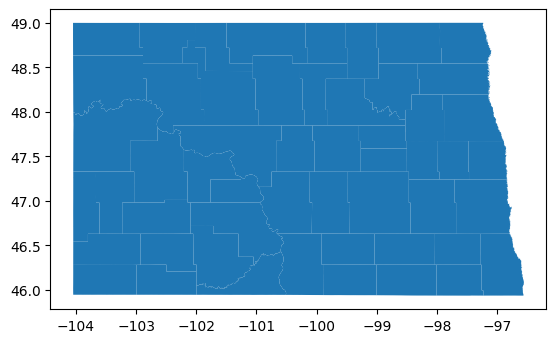

In [2]:
counties = gdf.dissolve(by="county_fips")

counties.plot()

In [3]:
import pandas as pd

incomes = pd.read_csv('nd_county_income_data.csv')

incomes.head()

,county_name,county_fips,income,rank
0,Sioux County,38085,"41,201","2,979"
1,Eddy County,38027,"50,375","2,518"
2,Rolette County,38079,"53,806","2,246"
3,Grant County,38037,"57,069","1,966"
4,Kidder County,38043,"57,240","1,948"


In [4]:
merged = counties.merge(incomes, on="county_fips")
merged["income"] = merged["income"].str.replace(',', '').astype('Int64')

merged.head()

,county_fips,geometry,county_name,income,rank
0,38001,"POLYGON ((-102.62476 45.94491, -102.63796 45.9...",Adams County,57950,"1,870"
1,38003,"POLYGON ((-98.19271 46.63114, -98.1952 46.6311...",Barnes County,64447,"1,248"
2,38005,"POLYGON ((-99.55557 47.84666, -99.55903 47.846...",Benson County,63220,"1,349"
3,38007,"POLYGON ((-103.60957 46.75247, -103.60957 46.7...",Billings County,74000,615
4,38009,"POLYGON ((-101.05964 48.62866, -101.05966 48.6...",Bottineau County,80113,398


Text(0.5, 1.0, 'North Dakota Income by County')

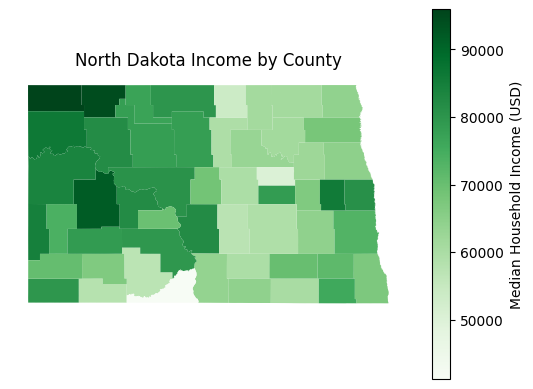

In [5]:
plot = merged.plot(column="income", cmap='Greens', legend=True, legend_kwds={'label':'Median Household Income (USD)'})
plot.set_axis_off()
plot.set_title('North Dakota Income by County')